In [51]:
import pandas as pd
import numpy as np
from collections import Counter
import re

In [52]:
df = pd.read_excel('Testing.xlsx')

In [53]:
#df

In [54]:
# Drop NaN values in Dataframe
df = df.dropna()
# Show Dataframe
df

,Mode,Message
0,Angry,Tu to chup kr ja desh
1,Angry,Bush kr de bush
2,Normal,Ya puchna ya tha k Shair kisi b traha ka send ...
3,Happy,Han g phir to any dain gy per ap k any k bgair...
4,Normal,Everyone please bs kro yr
...,...,...
525,Normal,cr ko add kro bas
526,Normal,Mujhy interest ni wrna m ye khel leni thi
528,Fear,Mauf kar dein
533,Angry,Ankhon ka msla ho to m maan b lon


In [55]:
#df = df.sample(frac = 1)
#df

In [59]:
# Get the unique values of 'Mode' column
df.Mode.unique()

array(['Negative', 'Positive'], dtype=object)

In [60]:
# Change Column value --> from 'fear' to 'Fear' :)
df["Mode"].replace({"Angry ": "Angry", "fear": "Fear",}, inplace=True)

In [58]:
# Change Column value --> from 'fear' to 'Fear' :)
df["Mode"].replace({"Normal": "Positive", "Happy": "Positive", "Love": "Positive",}, inplace=True)
df["Mode"].replace({"Angry": "Negative", "Fear": "Negative", "Sad": "Negative",}, inplace=True)

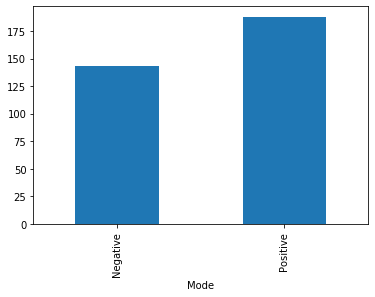

In [22]:
import matplotlib.pyplot as plt

# a simple line plot
#df.plot(kind='bar',x='Mode',y='Message')
df.groupby('Mode')['Message'].nunique().plot(kind='bar')
plt.show()

In [61]:
df['Mode'].value_counts()

Positive    188
Negative    143
Name: Mode, dtype: int64

In [62]:
vocab = {}

In [63]:
def initializeVocabulary():
    unkToken = '<UNK>'
    #create another vocab inside vocab -> text to index
    vocab['t_2_i'] = {}
    #create another vocab inside vocab -> index to text
    vocab['i_2_t'] = {}
    # Add token in key 'unkToken' = '<UNK>'
    vocab['unkToken'] = unkToken
    # call function 'addToken()' that return token index
    idx = addToken(unkToken)
    vocab['unkTokenIdx'] = idx

In [64]:
def addToken(token):
    # if token already in vocab then just return index
    if token in vocab['t_2_i']:
        idx = vocab['t_2_i'][token]
    else:
        # create index for new tokken --> simply new index == len(vocab) /*last number*/
        idx = len(vocab['t_2_i'])
        vocab['t_2_i'][token] = idx
        vocab['i_2_t'][idx] = token
    return idx

In [65]:
def addManyTokens(tokens):
    idxes = [addToken(token) for token in tokens]
    return idxes

In [66]:
def lookUpToken(token):
    return vocab['t_2_i'].get(token,vocab['unkTokenIdx'])

In [67]:
def lookUpIndex(idx):
    if idx not in vocab['i_2_t']:
        raise KeyError("the index (%d) is not there" % idx)
    return vocab['i_2_t'][idx]

In [68]:
def vocabularyFromDataFrame(df,cutoff=2):
    initializeVocabulary()
    wordCounts = Counter()
    for r in df.review:
        for word in re.split('\W+',r):
            wordCounts[word] += 1
    for word,count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [69]:
def vocabularyFromCorpus(Corpus,cutoff=2):
    initializeVocabulary()
    wordCounts = Counter()
    for doc in Corpus:
        for word in re.split('\W+',doc):
            wordCounts[word] += 1
    for word,count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [70]:
def oneHotVector(token,N):
    oneHot = np.zeros((N,1))
    oneHot[lookUpToken(token)] = 1
    return oneHot

In [71]:
def computeFeatures(doc,N):
    isFirst = True
    for token in doc:
        oneHot = oneHotVector(token,N)
        if isFirst:
            xF = oneHot
            isFirst = False
        else:
            xF = np.hstack((xF,oneHot))
    return np.mean(xF,axis=1)[:,np.newaxis]

In [72]:
def computeFeatures_fast(doc,N):
    fv = np.zeros(N)
    numTokens = 0
    for token in doc:
        fv[lookUpToken(token)] += 1
        numTokens += 1
    return fv/numTokens

In [73]:
def corpusToFeatureMatrix(Corpus,N):
    isFirst = True
    for doc in Corpus:
        fv = computeFeatures(doc,N)
        if isFirst:
            fM = fv
            isFirst = False
        else:
            fM = np.hstack((fM,fv))
    return fM.T

In [74]:
def corpusToFeatureMatrix_fast(Corpus,N):
    fM = np.zeros((N,len(Corpus)))
    i = 0
    for doc in Corpus:
        fM[:,i] = computeFeatures_fast(doc,N)
        i+=1
    return fM.T

In [75]:
X = np.asarray(df['Message'])
y = np.asarray(df['Mode'])

In [76]:
X[:5], y[:5]

(array(['Tu to chup kr ja desh', 'Bush kr de bush',
        'Ya puchna ya tha k Shair kisi b traha ka send kr sakty hn na',
        'Han g phir to any dain gy per ap k any k bgair kesy hgi attendence puri',
        'Everyone please bs kro yr'], dtype=object),
 array(['Negative', 'Negative', 'Positive', 'Positive', 'Positive'],
       dtype=object))

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=True)

In [79]:
vocabularyFromCorpus(Xtrain)

In [80]:
len(vocab['t_2_i'])

112

In [81]:
N = len(vocab['t_2_i'])
Xtrain_fM = corpusToFeatureMatrix_fast(Xtrain,N)
Xtest_fM = corpusToFeatureMatrix_fast(Xtest,N)

In [107]:
Xtrain_fM

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67058824, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64516129, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70833333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62068966, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [82]:
Xtrain_fM.shape

(231, 112)

In [83]:
Xtest_fM.shape

(100, 112)

In [103]:
#from sklearn.linear_model import LogisticRegression as clf
from sklearn.naive_bayes import GaussianNB as clf
#from sklearn.ensemble import RandomForestClassifier as clf
#from sklearn.svm import SVC as clf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [104]:
M = clf().fit(Xtrain_fM,ytrain)

In [105]:
y_pred = M.predict(Xtest_fM)

Text(89.133125, 0.5, 'Predicted Label')

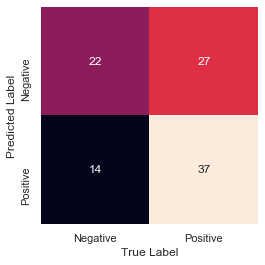

In [106]:
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [81]:
#clf.score(Xtrain, ytrain)

In [82]:
#clf.score(Xtest, ytest)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        36
    Positive       0.64      1.00      0.78        64

    accuracy                           0.64       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.41      0.64      0.50       100



c:\users\hassan raza\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
